In [17]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import random

In [2]:
ds = pd.read_csv('./data/Salary_Data.csv')
X = ds['YearsExperience'].values
y = ds['Salary'].values

In [3]:
X

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [5]:
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872])

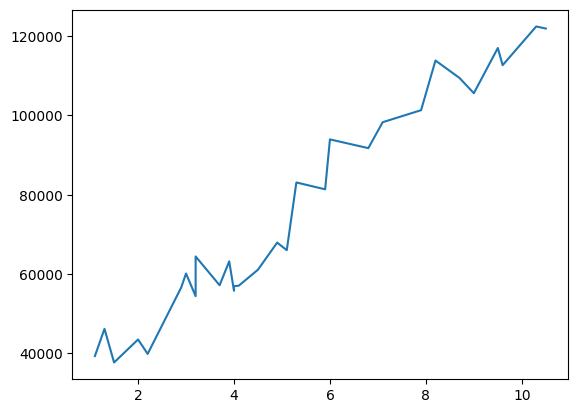

In [6]:
plt.plot(X,y)

In [8]:
X = np.array(X)
Y = np.array(y)

In [9]:
def mean(X):
    return sum(X)/len(X)

In [10]:
def variance(X):
    mean_value = mean(X)
    return np.sum((X-mean_value)**2)/len(X)

In [11]:
def norm(X):
    mean_value = mean(X)
    variance_value = variance(X)
    return (X - mean_value) / np.sqrt(variance_value)

In [12]:
X_norm = norm(X)

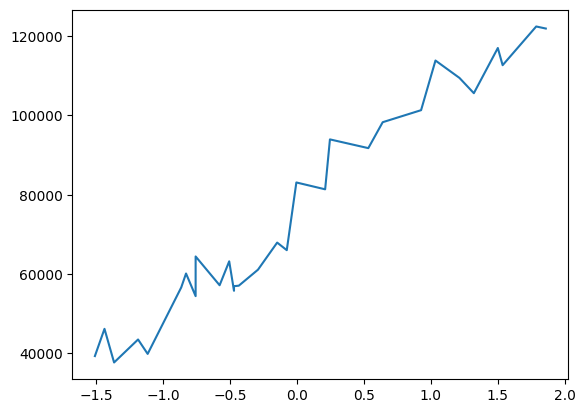

In [13]:
plt.plot(X_norm,Y)

In [ ]:
class SimpleLR:
    def __init__(lr=0.1, max_iter=2000, threshold=1e-6):
        self.lr = lr
        self.max_iter = max_iter
        self.threshold = threshold
        self.weight= random.uniform(-1,1)
        self.bias = random.uniform(-1,1)
    def predict(self,X):
        return self.weight*X + self.bias
    def fit(self,X,Y):
        n = len(X)
        loss_history = []
        y_pred = self.predict(X)
        errors = Y-y_pred
        prev_loss = (1/(2*n))*np.sum(errors**2)
        loss_history.append(prev_loss)
        for i in range(self.max_iter):
            w_grad = (1/n)*np.sum(errors*X)
            b_grad = (1/n)*np.sum(errors)
            self.weight += self.lr*w_grad
            self.bias += self.lr*b_grad
            errors = Y-self.predict(X)
            curr_loss = (1/(2*n))*np.sum(errors**2)
            if np.abs(curr_loss-prev_loss)<self.threshold:
                break
            prev_loss = curr_loss
            loss_history.append(curr_loss)
        return loss_history
    def plot(self,X,Y):
        y_pred = self.predict(X)
        plt.plot(X,Y)
        plt.plot(X,y_pred)

In [18]:
model = SimpleLR()

In [19]:
loss_history = model.fit(X_norm,Y)

In [20]:
loss_history

[np.float64(3251455003.4775906),
 np.float64(2636649293.2304645),
 np.float64(2138656667.9302933),
 np.float64(1735282641.4371545),
 np.float64(1408549679.9777114),
 np.float64(1143895981.195563),
 np.float64(929526485.1820229),
 np.float64(755887193.4110553),
 np.float64(615239367.0765715),
 np.float64(501314627.7456397),
 np.float64(409035588.88758475),
 np.float64(334289567.4125603),
 np.float64(273745290.0177906),
 np.float64(224704425.32802716),
 np.float64(184981324.92931867),
 np.float64(152805613.60636485),
 np.float64(126743287.43477225),
 np.float64(105632803.23578222),
 np.float64(88533311.03460032),
 np.float64(74682722.35164303),
 np.float64(63463745.518447556),
 np.float64(54376374.28355926),
 np.float64(47015603.58329965),
 np.float64(41053379.31608937),
 np.float64(36223977.65964906),
 np.float64(32312162.31793248),
 np.float64(29143591.89114196),
 np.float64(26577049.84544169),
 np.float64(24498150.78842445),
 np.float64(22814242.55224049),
 np.float64(21450276.8809314

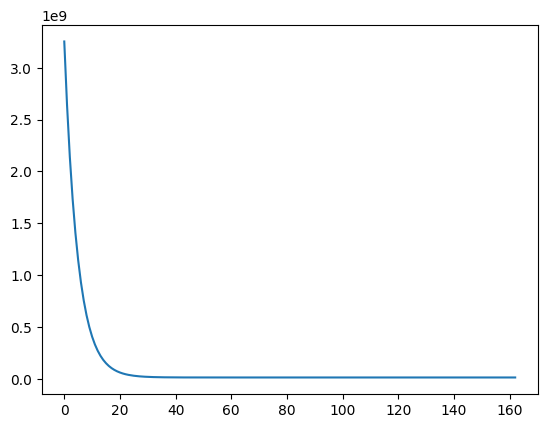

In [21]:
plt.plot(loss_history)

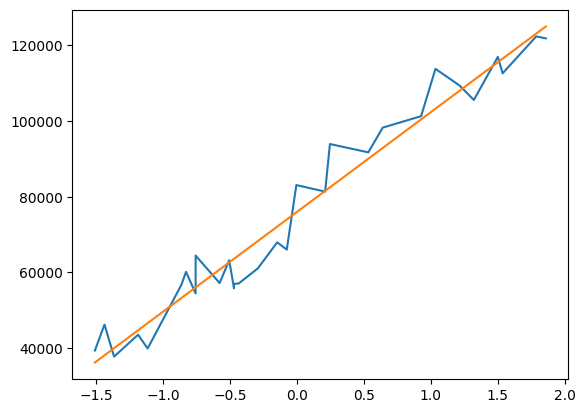

In [22]:
model.plot(X_norm,Y)